In [14]:
!pip install pillow

In [15]:
!pip install requests

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [17]:
import requests

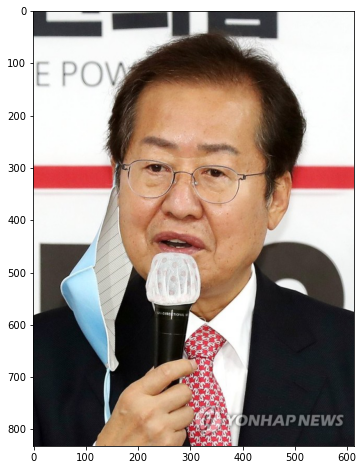

In [18]:
img = mpimg.imread('hoog.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [19]:
client_id = "Buuxd9FJv1ge3z1q0T2K"
client_secret = "sUQ4GEbMHZ"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('hoog.jpg','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [20]:
import json

In [21]:
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False)) #모리시타유리

{
    "info": {
        "size": {
            "width": 613,
            "height": 832
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "홍준표",
                "confidence": 1.0
            }
        }
    ]
}


In [23]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('hoog.jpg','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 613,
            "height": 832
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 167,
                "y": 241,
                "width": 273,
                "height": 273
            },
            "landmark": {
                "leftEye": {
                    "x": 232,
                    "y": 296
                },
                "rightEye": {
                    "x": 345,
                    "y": 308
                },
                "nose": {
                    "x": 279,
                    "y": 374
                },
                "leftMouth": {
                    "x": 232,
                    "y": 436
                },
                "rightMouth": {
                    "x": 328,
                    "y": 449
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999963
            },
           

In [24]:
detect_result = parsed

In [25]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [26]:
detect_result['faces']

[{'roi': {'x': 167, 'y': 241, 'width': 273, 'height': 273},
  'landmark': {'leftEye': {'x': 232, 'y': 296},
   'rightEye': {'x': 345, 'y': 308},
   'nose': {'x': 279, 'y': 374},
   'leftMouth': {'x': 232, 'y': 436},
   'rightMouth': {'x': 328, 'y': 449}},
  'gender': {'value': 'male', 'confidence': 0.999963},
  'age': {'value': '64~68', 'confidence': 1.0},
  'emotion': {'value': 'talking', 'confidence': 0.996357},
  'pose': {'value': 'frontal_face', 'confidence': 0.999976}}]

In [27]:
detect_result['faces'][0]  #첫번째 이미지 값만 갔고옴

{'roi': {'x': 167, 'y': 241, 'width': 273, 'height': 273},
 'landmark': {'leftEye': {'x': 232, 'y': 296},
  'rightEye': {'x': 345, 'y': 308},
  'nose': {'x': 279, 'y': 374},
  'leftMouth': {'x': 232, 'y': 436},
  'rightMouth': {'x': 328, 'y': 449}},
 'gender': {'value': 'male', 'confidence': 0.999963},
 'age': {'value': '64~68', 'confidence': 1.0},
 'emotion': {'value': 'talking', 'confidence': 0.996357},
 'pose': {'value': 'frontal_face', 'confidence': 0.999976}}

In [28]:
detect_result['faces'][0]['roi'] #구역 확인

{'x': 167, 'y': 241, 'width': 273, 'height': 273}

In [29]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999963}

In [30]:
detect_result['faces'][0]['age']

{'value': '64~68', 'confidence': 1.0}

In [31]:
detect_result['faces'][0]['emotion']

{'value': 'talking', 'confidence': 0.996357}

In [32]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [33]:
annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [34]:
import matplotlib.patches as patches

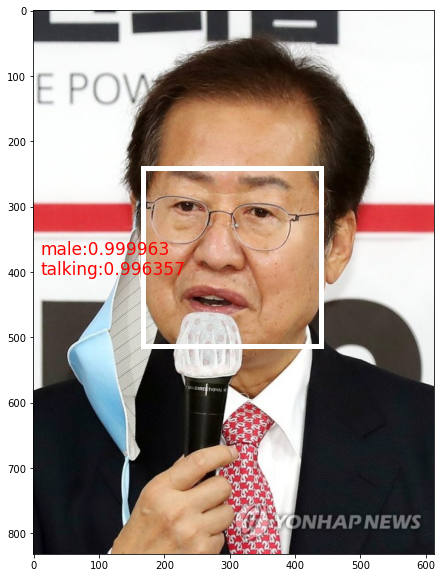

In [52]:
img = mpimg.imread('hoog.jpg') #한사람만

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='w', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=17, color='red')
plt.show()

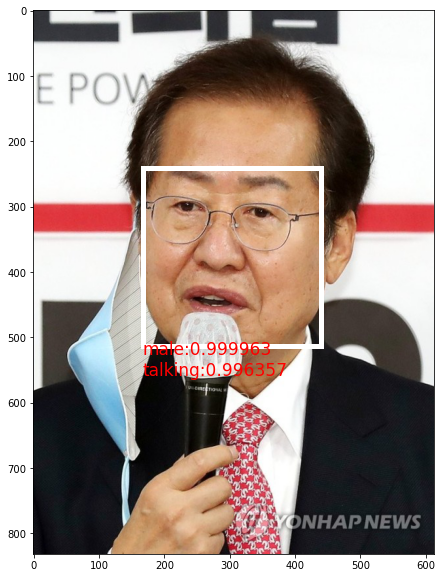

In [49]:
img = mpimg.imread('hoog.jpg')   #여러사람 하기

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='w', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='red')
    ax.add_patch(rect_face)

    
plt.show()